<a href="https://colab.research.google.com/github/lightituphome/Road-Lane-Line-Detection/blob/main/CV_Code_for_Road_Lane_Line_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files

In [2]:
def grayscale(image):

    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [3]:
def canny(image):

    gray = grayscale(image)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)
    return canny

In [4]:
def region_of_interest(image):

    height = image.shape[0]
    polygons = np.array([[(200, height), (1100, height), (550, 250)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

In [5]:
def display_lines(image, lines):

    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return line_image

In [6]:
def hough_transform(image):

    return cv2.HoughLinesP(image, 2, np.pi / 180, 100, np.array([]), minLineLength=40, maxLineGap=5)

In [7]:
def add_weighted(image, initial_image, α=0.8, β=1., γ=0.):

    return cv2.addWeighted(initial_image, α, image, β, γ)

In [8]:
def detect_lane_lines(image):

    canny_image = canny(image)
    cropped_image = region_of_interest(canny_image)
    lines = hough_transform(cropped_image)
    line_image = display_lines(image, lines)
    combined_image = add_weighted(line_image, image)
    return combined_image

In [9]:
uploaded = files.upload()

Saving road.jpg to road.jpg


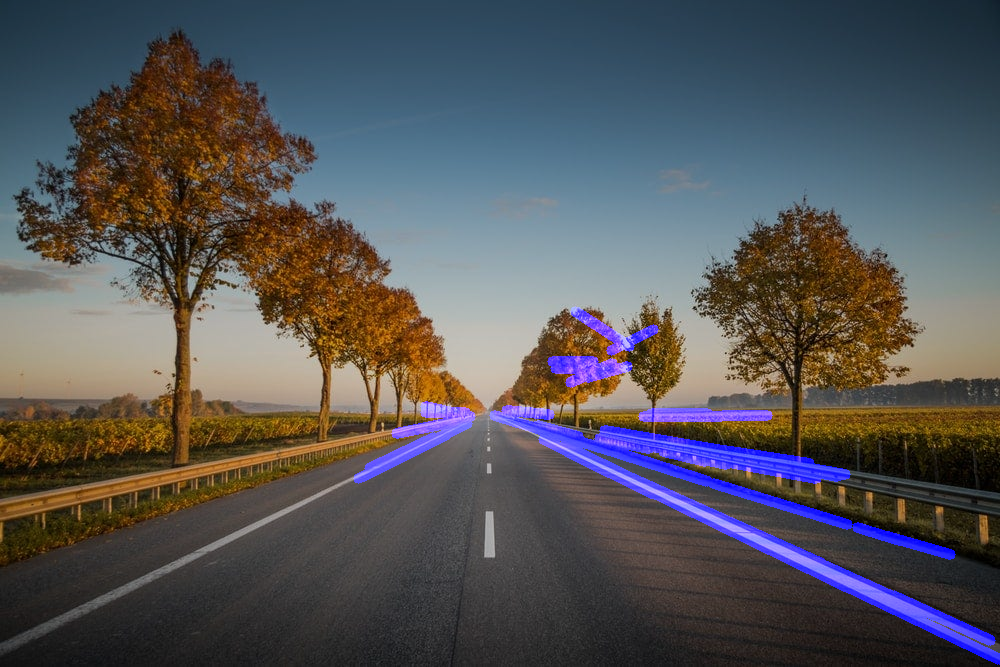

In [10]:
for fn in uploaded.keys():
    image = cv2.imread(fn)
    lane_lines_image = detect_lane_lines(image)
    cv2_imshow(lane_lines_image)

In [11]:
def region_of_interest(image):
    height = image.shape[0]
    polygons = np.array([[(x1, y1), (x2, y2), (x3, y3)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_image = cv2.bitwise_and(image, mask)
    return masked_image

In [12]:
def canny(image):
    gray = grayscale(image)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, low_threshold, high_threshold)
    return canny

In [13]:
def hough_transform(image):
    return cv2.HoughLinesP(image, rho, theta, threshold, np.array([]), minLineLength, maxLineGap)